In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import seawater as sw
import xarray as xr
import matplotlib.pyplot as plt
import glob

calc
tb
xarray
done xarray
IconData
plotting
view
calc
tb
IconData
plotting
view
quickplots
quickplots


In [3]:
def cut_equator(lon, lat, data, inds_eq, iw):
    nt = data.time.size
    data_eq = np.ma.zeros((nt,lon.size))
    for ll in range(nt):
        print(f'll = {ll}/{nt}', end='\r')
        data_eq[ll,:] = data[ll,inds_eq]
        print(data.time[ll].data)    
    data_eqs = np.ma.concatenate((data_eq[:,iw:], data_eq[:,:iw]), axis=1)
    return data_eqs

# Load the data

## Grid for interpolation

In [4]:
run = 'rar0365'
path_data = f'/work/mh0287/users/rene/experiments/{run}/'

In [5]:
# --- for atm data
fpath_ckdtree_atm = '/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b4_atm_r0013/ckdtree/rectgrids/r2b4_atm_r0013_res0.30_180W-180E_90S-90N.npz'
ddnpz = np.load(fpath_ckdtree_atm)
lat = ddnpz['lat']
lon = ddnpz['lon']
inds = ddnpz['ickdtree_c'].reshape(lat.size, lon.size)
j0 = np.argmin(lat**2)
inds_eq = inds[j0,:]

In [6]:
# --- for oce data
fpath_ckdtree_oce = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b4_oce_r0004/ckdtree/rectgrids/r2b4_oce_r0004_res0.30_180W-180E_90S-90N.npz'
ddnpz = np.load(fpath_ckdtree_oce)
# lat = ddnpz['lat']
# lon = ddnpz['lon']
indso = ddnpz['ickdtree_c'].reshape(lat.size, lon.size)
# j0 = np.argmin(lat**2)
indso_eq = indso[j0,:]

In [7]:
# --- for making grid Pacific centered the grid
iw = (lon<0.).sum()
lon_s = np.concatenate((lon[iw:],lon[:iw]))
lon_s[lon_s<0.] += 360.

## Atm. 2D data

### Exp. 1

In [8]:
run = 'rar0365'
path_data = f'/work/mh0287/users/rene/experiments/{run}/'

flist = glob.glob(f'{path_data}{run}_atm3_2d_ml_????????????????.nc')
flist.sort()
flist = flist[:-1]

ds = xr.open_mfdataset(flist)
time = pyic.nctime_to_datetime64(ds.time.data, time_mode='float2date')
ds['time'] = time
ds.attrs['run'] = run
ds.attrs['path_data'] = path_data
ds1 = ds

ds1.time.data

### Exp. 2

In [10]:
run = 'rar0368'
path_data = f'/work/mh0287/users/rene/experiments/{run}/'

flist = glob.glob(f'{path_data}{run}_atm3_2d_ml_????????????????.nc')
flist.sort()
flist = flist[:-1]

ds = xr.open_mfdataset(flist)
time = pyic.nctime_to_datetime64(ds.time.data, time_mode='float2date')
ds['time'] = time
ds.attrs['run'] = run
ds.attrs['path_data'] = path_data
ds2 = ds

ds2.time.data

### Wind along equator

In [12]:
uas_eqs1 = cut_equator(lon, lat, ds1.uas[:,:], inds_eq, iw)
# uas_eqs1[:,mask_eqs==False] = np.ma.masked
uas_eqs2 = cut_equator(lon, lat, ds2.uas[:,:], inds_eq, iw)
# uas_eqs2[:,mask_eqs==False] = np.ma.masked

2020-01-20T00:00:00.000000000
2020-01-20T01:00:00.000000000
2020-01-20T02:00:00.000000000
2020-01-20T03:00:00.000000000
2020-01-20T04:00:00.000000000
2020-01-20T05:00:00.000000000
2020-01-20T06:00:00.000000000
2020-01-20T07:00:00.000000000
2020-01-20T08:00:00.000000000
2020-01-20T09:00:00.000000000
2020-01-20T10:00:00.000000000
2020-01-20T11:00:00.000000000
2020-01-20T12:00:00.000000000
2020-01-20T13:00:00.000000000
2020-01-20T14:00:00.000000000
2020-01-20T15:00:00.000000000
2020-01-20T16:00:00.000000000
2020-01-20T17:00:00.000000000
2020-01-20T18:00:00.000000000
2020-01-20T19:00:00.000000000
2020-01-20T20:00:00.000000000
2020-01-20T21:00:00.000000000
2020-01-20T22:00:00.000000000
2020-01-20T23:00:00.000000000
2020-01-20T00:00:00.000000000
2020-01-20T01:00:00.000000000
2020-01-20T02:00:00.000000000
2020-01-20T03:00:00.000000000
2020-01-20T04:00:00.000000000
2020-01-20T05:00:00.000000000
2020-01-20T06:00:00.000000000
2020-01-20T07:00:00.000000000
2020-01-20T08:00:00.000000000
2020-01-20

In [13]:
nt = ds1.time.size

<IPython.core.display.Javascript object>


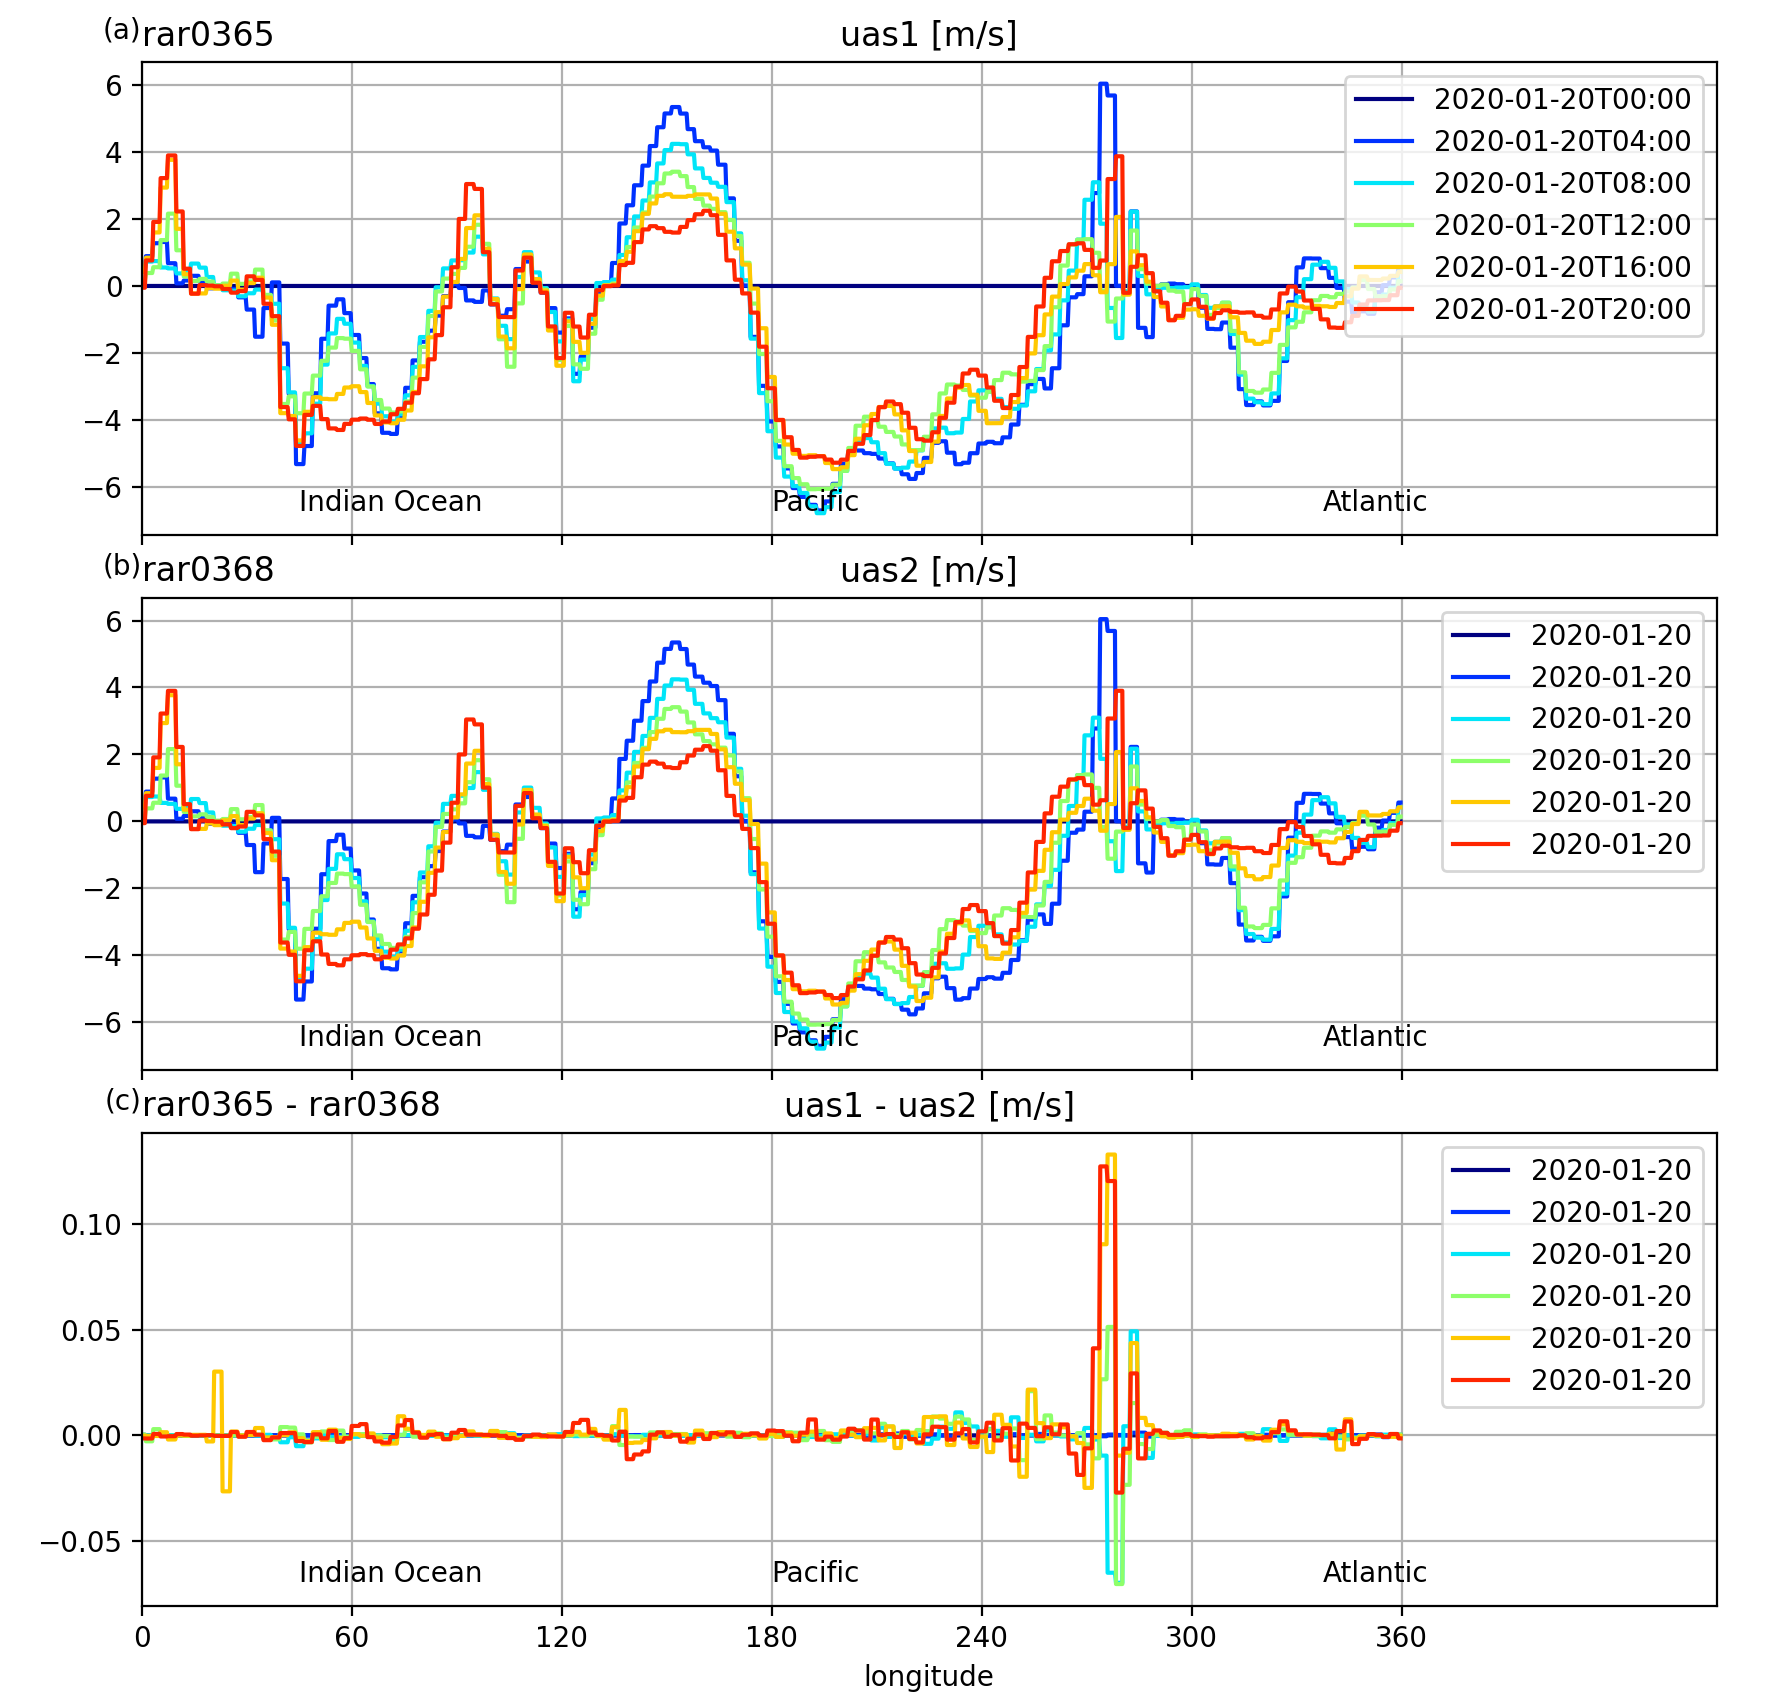

In [14]:
hca, hcb = pyic.arrange_axes(1,3, asp=0.3, fig_size_fac=1.5, sharex=True, sharey=True, plot_cb=False,
                            xlabel='longitude')
ii=-1

cols = plt.cm.get_cmap('jet')(np.linspace(0,1,nt))

ii+=1; ax=hca[ii]; cax=hcb[ii]
for ll in range(0,nt,4):
    ax.plot(lon_s, uas_eqs1[ll,:], color=cols[ll,:], label=str(ds1.time[ll].data)[:16])  
ax.set_title(ds1.run, loc='left')
ax.set_title('uas1 [m/s]')

ii+=1; ax=hca[ii]; cax=hcb[ii]
for ll in range(0,nt,4):
    ax.plot(lon_s, uas_eqs2[ll,:], color=cols[ll,:], label=str(ds1.time[ll].data)[:10])  
ax.set_title(ds2.run, loc='left')
ax.set_title('uas2 [m/s]')

ii+=1; ax=hca[ii]; cax=hcb[ii]
for ll in range(0,nt,4):
    ax.plot(lon_s, uas_eqs1[ll,:]-uas_eqs2[ll,:], color=cols[ll,:], label=str(ds1.time[ll].data)[:10])  
ax.set_title(f'{ds1.run} - {ds2.run}', loc='left')
ax.set_title('uas1 - uas2 [m/s]')

for ax in hca:
#     ax.plot(dsera.lon, dsera.ua[j0era,0,:], color='k', label='ERA5 2010-02')
    ax.legend()
    ax.text(0.1,0.05, 'Indian Ocean', transform=ax.transAxes)
    ax.text(0.4,0.05, 'Pacific', transform=ax.transAxes)
    ax.text(0.75,0.05, 'Atlantic', transform=ax.transAxes)
    ax.set_xlim(0, 450)
    ax.set_xticks(np.linspace(0,360,7))
    ax.grid(True)

In [15]:
it = 10
lon, lat, uasi1 = pyic.interp_to_rectgrid(ds1.uas[it,:], fpath_ckdtree_atm, coordinates='clat clon')
lon, lat, uasi2 = pyic.interp_to_rectgrid(ds2.uas[it,:], fpath_ckdtree_atm, coordinates='clat clon')

<IPython.core.display.Javascript object>


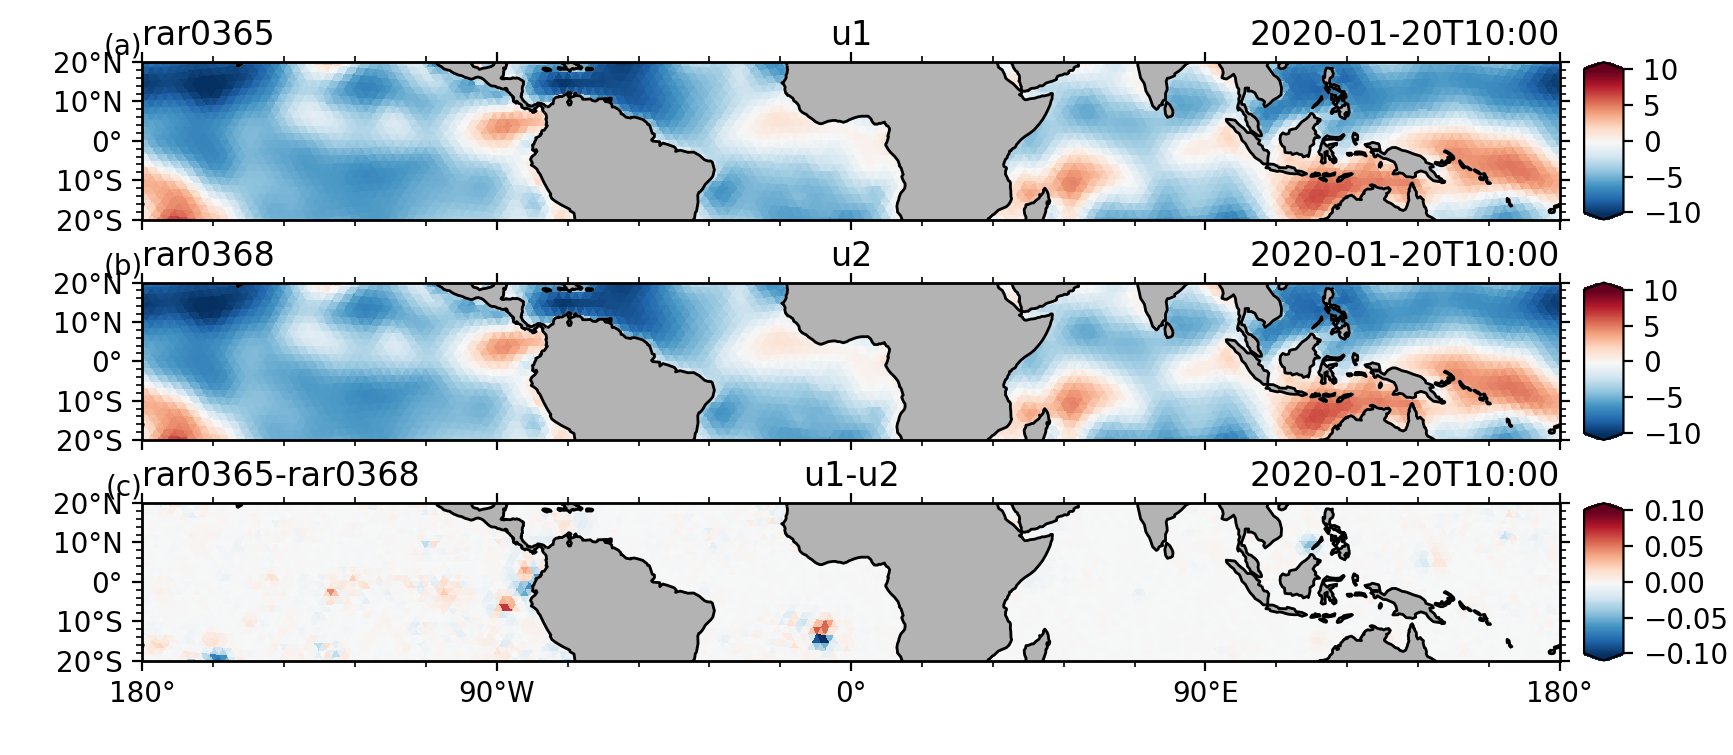

In [16]:
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,3, asp=0.111, projection=ccrs_proj, fig_size_fac=0.5, sharex=True, sharey=True,
                            plot_cb=True)
ii=-1

xlim = [-180,180]
ylim = [-20, 20]

clim = 10.

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, uasi1[:,:], ax=ax, cax=cax, clim=clim, projection=ccrs_proj)
ax.set_title(f'{str(ds1.time[it].data)[:16]}', loc='right')
ax.set_title(f'{ds1.run}', loc='left')
ax.set_title('u1')
                             
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, uasi2[:,:], ax=ax, cax=cax, clim=clim, projection=ccrs_proj)
ax.set_title(f'{str(ds2.time[it].data)[:16]}', loc='right')
ax.set_title(f'{ds2.run}', loc='left')
ax.set_title('u2')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, uasi1[:,:]-uasi2[:,:], ax=ax, cax=cax, clim=0.1, projection=ccrs_proj)
ax.set_title(f'{str(ds2.time[it].data)[:16]}', loc='right')
ax.set_title(f'{ds1.run}-{ds2.run}', loc='left')
ax.set_title('u1-u2')
    
for ax in hca:
    pyic.plot_settings(ax=ax, xlim=xlim, ylim=ylim)

### Exp. 1

In [19]:
run = 'rar0365'
path_data = f'/work/mh0287/users/rene/experiments/{run}/'

flist = glob.glob(f'{path_data}{run}_atm4_2d_ml_????????????????.nc')
flist.sort()
flist = flist[:-1]

ds = xr.open_mfdataset(flist)
time = pyic.nctime_to_datetime64(ds.time.data, time_mode='float2date')
ds['time'] = time
ds.attrs['run'] = run
ds.attrs['path_data'] = path_data
ds1 = ds

ds1.time.data

array(['2020-01-20T00:00:00.000000000', '2020-01-20T01:00:00.000000000',
       '2020-01-20T02:00:00.000000000', '2020-01-20T03:00:00.000000000',
       '2020-01-20T04:00:00.000000000', '2020-01-20T05:00:00.000000000',
       '2020-01-20T06:00:00.000000000', '2020-01-20T07:00:00.000000000',
       '2020-01-20T08:00:00.000000000', '2020-01-20T09:00:00.000000000',
       '2020-01-20T10:00:00.000000000', '2020-01-20T11:00:00.000000000',
       '2020-01-20T12:00:00.000000000', '2020-01-20T13:00:00.000000000',
       '2020-01-20T14:00:00.000000000', '2020-01-20T15:00:00.000000000',
       '2020-01-20T16:00:00.000000000', '2020-01-20T17:00:00.000000000',
       '2020-01-20T18:00:00.000000000', '2020-01-20T19:00:00.000000000',
       '2020-01-20T20:00:00.000000000', '2020-01-20T21:00:00.000000000',
       '2020-01-20T22:00:00.000000000', '2020-01-20T23:00:00.000000000'],
      dtype='datetime64[ns]')

### Exp. 2

In [20]:
run = 'rar0368'
path_data = f'/work/mh0287/users/rene/experiments/{run}/'

flist = glob.glob(f'{path_data}{run}_atm4_2d_ml_????????????????.nc')
flist.sort()
flist = flist[:-1]

ds = xr.open_mfdataset(flist)
time = pyic.nctime_to_datetime64(ds.time.data, time_mode='float2date')
ds['time'] = time
ds.attrs['run'] = run
ds.attrs['path_data'] = path_data
ds2 = ds

ds2.time.data

array(['2020-01-20T00:00:00.000000000', '2020-01-20T01:00:00.000000000',
       '2020-01-20T02:00:00.000000000', '2020-01-20T03:00:00.000000000',
       '2020-01-20T04:00:00.000000000', '2020-01-20T05:00:00.000000000',
       '2020-01-20T06:00:00.000000000', '2020-01-20T07:00:00.000000000',
       '2020-01-20T08:00:00.000000000', '2020-01-20T09:00:00.000000000',
       '2020-01-20T10:00:00.000000000', '2020-01-20T11:00:00.000000000',
       '2020-01-20T12:00:00.000000000', '2020-01-20T13:00:00.000000000',
       '2020-01-20T14:00:00.000000000', '2020-01-20T15:00:00.000000000',
       '2020-01-20T16:00:00.000000000', '2020-01-20T17:00:00.000000000',
       '2020-01-20T18:00:00.000000000', '2020-01-20T19:00:00.000000000',
       '2020-01-20T20:00:00.000000000', '2020-01-20T21:00:00.000000000',
       '2020-01-20T22:00:00.000000000', '2020-01-20T23:00:00.000000000'],
      dtype='datetime64[ns]')

In [21]:
it = 10
lon, lat, tauu1 = pyic.interp_to_rectgrid(ds1.tauu[it,:], fpath_ckdtree_atm, coordinates='clat clon')
lon, lat, tauu2 = pyic.interp_to_rectgrid(ds2.tauu[it,:], fpath_ckdtree_atm, coordinates='clat clon')

<IPython.core.display.Javascript object>


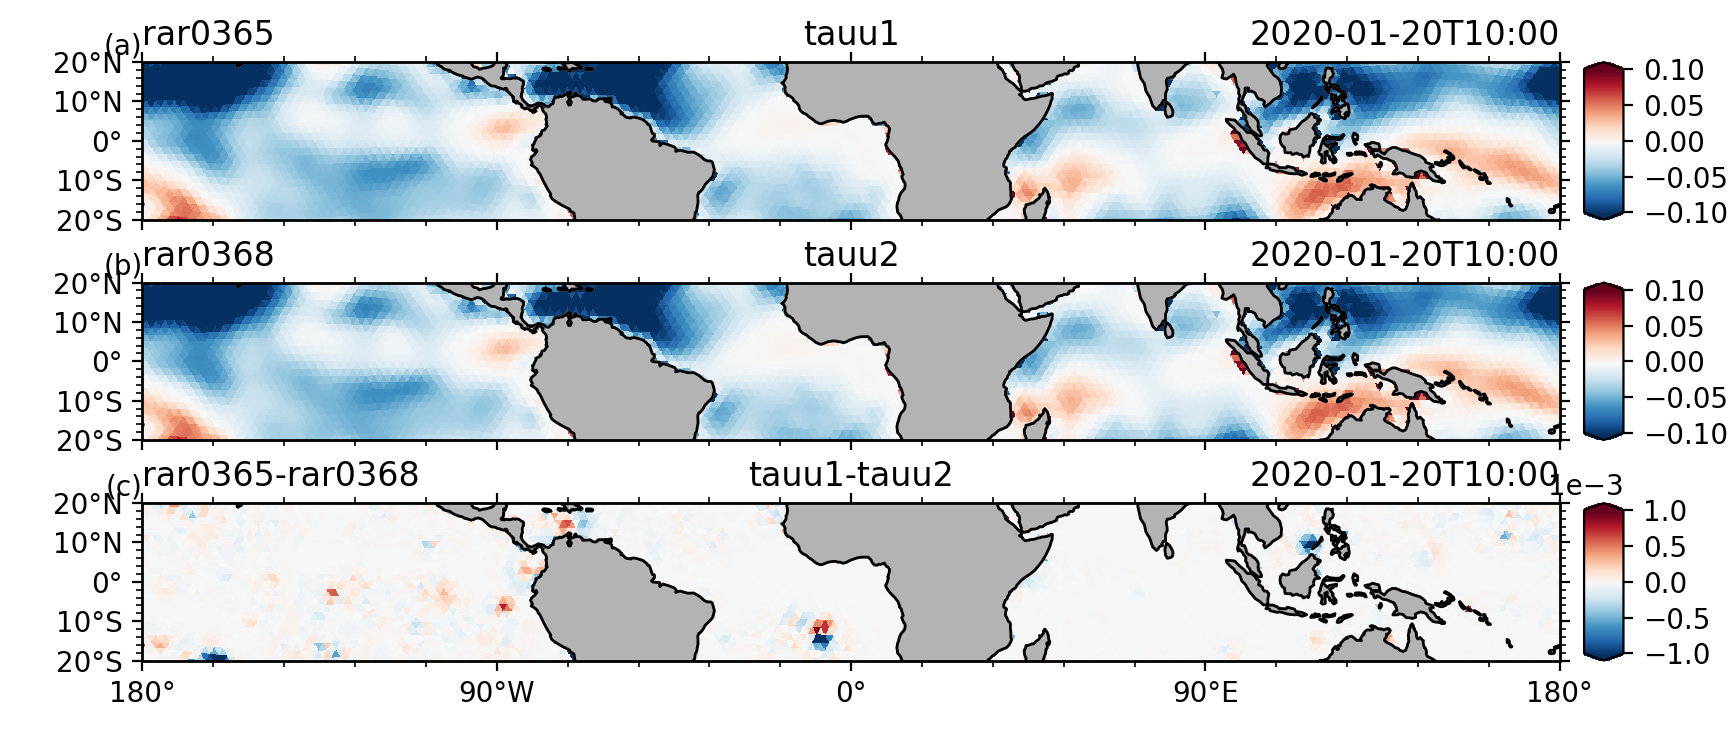

In [28]:
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,3, asp=0.111, projection=ccrs_proj, fig_size_fac=0.5, sharex=True, sharey=True,
                            plot_cb=True)
ii=-1

xlim = [-180,180]
ylim = [-20, 20]

clim = 0.1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, tauu1[:,:], ax=ax, cax=cax, clim=clim, projection=ccrs_proj)
ax.set_title(f'{str(ds1.time[it].data)[:16]}', loc='right')
ax.set_title(f'{ds1.run}', loc='left')
ax.set_title('tauu1')
                             
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, tauu2[:,:], ax=ax, cax=cax, clim=clim, projection=ccrs_proj)
ax.set_title(f'{str(ds2.time[it].data)[:16]}', loc='right')
ax.set_title(f'{ds2.run}', loc='left')
ax.set_title('tauu2')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, tauu1[:,:]-tauu2[:,:], ax=ax, cax=cax, clim=0.001, projection=ccrs_proj)
ax.set_title(f'{str(ds2.time[it].data)[:16]}', loc='right')
ax.set_title(f'{ds1.run}-{ds2.run}', loc='left')
ax.set_title('tauu1-tauu2')
    
for ax in hca:
    pyic.plot_settings(ax=ax, xlim=xlim, ylim=ylim)